In [1]:
#from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#drive.mount('/content/drive')
#pasta_drive = '/content/drive/MyDrive/Classroom/DCC127-2020.3-A - MINERAÇÃO DE DADOS - DEPTO DE CIENCIA DA COMPUTACAO  ICE/'
pasta_drive = ''
dados = pd.read_csv(pasta_drive + "trabalho2_dados_21.csv")

dados

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
0,Green Lantern: Rise of the Manhunters,X360,Action,Warner Bros. Interactive Entertainment,0.10,7-Jun-11,59.0,17.0,7,22.0,Double Helix Games
1,Kinect Sports: Season Two,X360,Sports,Microsoft Game Studios,2.18,25-Oct-11,66.0,46.0,6.3,27.0,"BigPark, Rare Ltd."
2,Brothers in Arms: Double Time,Wii,Shooter,Ubisoft,0.12,23-Sep-08,45.0,13.0,6.6,17.0,Gearbox Software
3,Steambot Chronicles: Battle Tournament,PSP,Fighting,Irem Software Engineering,0.06,30-Jun-09,54.0,14.0,6.1,7.0,Irem
4,Tiger Woods PGA Tour 07,Wii,Sports,Electronic Arts,0.46,13-Mar-07,71.0,41.0,6.9,44.0,EA Redwood Shores
...,...,...,...,...,...,...,...,...,...,...,...
1627,Lost Planet: Extreme Condition,X360,Shooter,Capcom,1.31,12-Jan-07,79.0,76.0,7.1,161.0,Capcom
1628,Biohazard: Revival Selection,X360,Action,Capcom,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1629,Ratatouille,X360,Platform,THQ,0.24,26-Jun-07,56.0,14.0,tbd,NaN,Heavy Iron Studios
1630,Catherine,PS3,Adventure,Deep Silver,0.60,26-Jul-11,79.0,61.0,7.8,246.0,Atlus


In [103]:
#Remove as linhas que contém valores nulos e ordena o resultado pelo nome do jogo
dados = dados.sort_values('nome')
dados.head()

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
1555,0-ji no Kane to Cinderella: Halloween Wedding,PSP,Misc,Quinrose,0.01,NaN,NaN,NaN,NaN,NaN,NaN
738,007: Quantum of Solace,PS3,Action,Activision,1.09,NaN,NaN,NaN,NaN,NaN,NaN
1197,007: Quantum of Solace,Wii,Action,Activision,0.62,NaN,NaN,NaN,NaN,NaN,NaN
1307,1/2 Summer +,PSP,Adventure,Kaga Create,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1456,10 Minute Solution,Wii,Sports,Activision,0.06,29-Jun-10,NaN,NaN,tbd,NaN,Anchor Bay Entertainment


Analisando os tipos de cada varíavel, bem como a descrição das mesmas.

In [104]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                1632 non-null   object 
 1   plataforma          1632 non-null   object 
 2   genero              1632 non-null   object 
 3   editora             1630 non-null   object 
 4   vendas              1632 non-null   float64
 5   lancamento          1137 non-null   object 
 6   avaliacao-criticos  916 non-null    float64
 7   numero-criticos     916 non-null    float64
 8   avaliacao-usuarios  1112 non-null   object 
 9   numero-usuarios     851 non-null    float64
 10  fabricante          1128 non-null   object 
dtypes: float64(4), object(7)
memory usage: 153.0+ KB


Antes de começarmos a análise, iremos transformar o parâmetro gênero em uma variável categórica. Outra questão, observada pelo .info(), é o tipo da variável  avaliacao-usuarios, vamos passar para float.

In [ ]:
dados['genero'] = dados.genero.astype('category')
dados['plataforma'] = dados.genero.astype('category')
dados['avaliacao-usuarios'] = pd.to_numeric(dados['avaliacao-usuarios'],errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 1555 to 669
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   nome                1632 non-null   object  
 1   plataforma          1632 non-null   category
 2   genero              1632 non-null   category
 3   editora             1630 non-null   object  
 4   vendas              1632 non-null   float64 
 5   lancamento          1137 non-null   object  
 6   avaliacao-criticos  916 non-null    float64 
 7   numero-criticos     916 non-null    float64 
 8   avaliacao-usuarios  851 non-null    float64 
 9   numero-usuarios     851 non-null    float64 
 10  fabricante          1128 non-null   object  
dtypes: category(2), float64(5), object(4)
memory usage: 131.5+ KB


Como podemos observar na tabela acima, temos valores nulos no dataframe. Portanto, iremos retirar aquelas linhas que possuem valores nulos, para não atrapalhar a nossa análise.

In [ ]:
dados.dropna(axis=0,inplace=True)

Analisando a frequência, mediana, média e outros cálculos estatísticos, iremos aplicar o describe() no dataframe.

In [ ]:
dados.describe()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,0.884025,69.073292,34.724224,6.914783,119.853416
std,1.916295,14.531433,21.408221,1.495613,313.970149
min,0.010000,13.000000,4.000000,0.900000,4.000000
25%,0.160000,61.000000,17.000000,6.200000,13.000000
50%,0.380000,72.000000,32.000000,7.200000,29.000000
75%,0.850000,80.000000,49.000000,8.000000,85.000000
max,27.250000,98.000000,101.000000,9.500000,2923.000000


In [ ]:
#describe
print('**Describe das variáveis que não são numéricas')
for i in dados.keys():
  if type(dados[i][0])!=np.float64:
    print(dados[i].describe())
    print("\n")

**Describe das variáveis que não são numéricas
count                             1632
unique                            1438
top       LEGO Harry Potter: Years 5-7
freq                                 5
Name: nome, dtype: object


count     1632
unique       9
top        Wii
freq       416
Name: plataforma, dtype: object


count       1632
unique        12
top       Action
freq         365
Name: genero, dtype: object


count                1630
unique                179
top       Electronic Arts
freq                  159
Name: editora, dtype: object


count         1137
unique         527
top       1-Nov-11
freq            20
Name: lancamento, dtype: object


count        1128
unique        482
top       Ubisoft
freq           30
Name: fabricante, dtype: object




In [ ]:
dados.corr()

,vendas,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios
vendas,1.000000,0.322639,0.330162,0.131051,0.556160
avaliacao-criticos,0.322639,1.000000,0.463458,0.608111,0.336030
numero-criticos,0.330162,0.463458,1.000000,0.316025,0.467206
avaliacao-usuarios,0.131051,0.608111,0.316025,1.000000,0.102852
numero-usuarios,0.556160,0.336030,0.467206,0.102852,1.000000


## Nome do gráfico

In [ ]:
# Thiago
#plt.style.use('dark_background')
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',  
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

plataforma      3DS    PS3   PS4    PSP   PSV    Wii  WiiU   X360  XOne
genero                                                                 
Action         4.79  68.20  0.55  11.76  3.34  33.15  5.02  52.42  1.59
Adventure      3.69   5.22   NaN   1.48   NaN   3.70   NaN   2.27   NaN
Fighting       0.09  12.76   NaN   2.01  0.03  15.65   NaN  12.34   NaN
Misc           1.06   7.79   NaN   0.99   NaN  42.25   NaN  17.05  0.18
Platform      17.55   5.72  0.12   1.59  0.41  36.48  0.23   2.28   NaN
Puzzle         0.43   0.33   NaN   0.08   NaN   2.44   NaN   0.41   NaN
Racing         0.46  15.80  0.71  11.61  0.49   3.10   NaN  16.26  1.30
Role-Playing   1.21   9.00   NaN   3.24   NaN   3.18   NaN  19.92   NaN
Shooter         NaN  33.48  1.41   6.55  0.72   7.90  0.01  69.53   NaN
Simulation     0.38   1.02   NaN   2.52   NaN   2.50   NaN   2.88   NaN
Sports         0.66  32.28  0.59   8.91  0.16  39.61  0.23  29.70  0.54
Strategy        NaN   0.45  0.05   1.80   NaN   1.35   NaN   2.6

plataforma
3DS      4.79
PS3     68.20
PS4      0.55
PSP     11.76
PSV      3.34
Wii     33.15
WiiU     5.02
X360    52.42
XOne     1.59
Name: Action, dtype: float64

## Nome do outro gráfico

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


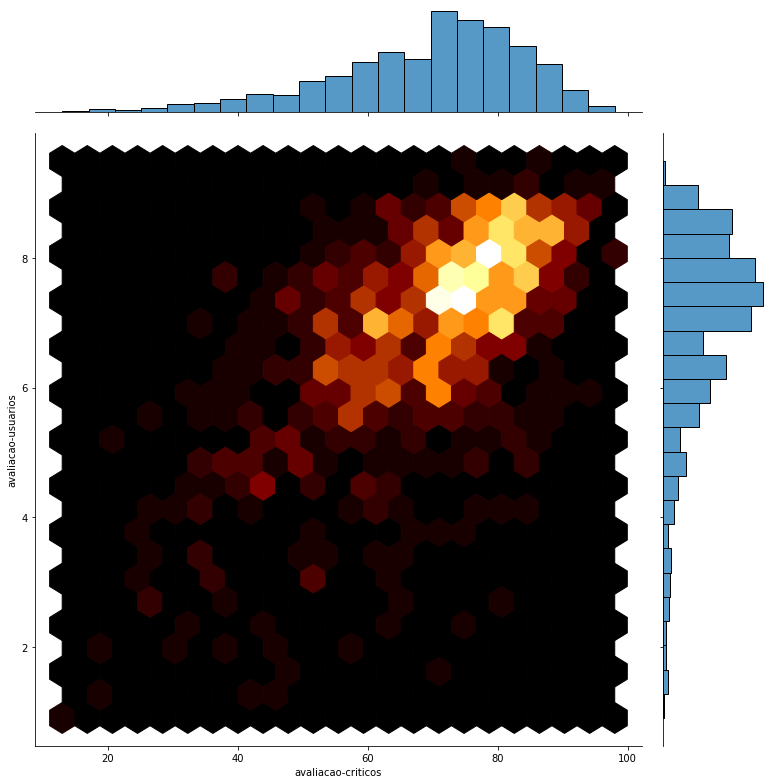

In [ ]:
sns.jointplot(x='avaliacao-criticos',y='avaliacao-usuarios',data=dados,
              kind='hex', cmap= 'afmhot', size=11)